# RealPython.com Neural Networks Tutorial

##### The first step in building a neural network is generating an output from input data. You’ll do that by creating a weighted sum of the variables

In this first example, you have an input vector and the other two weight vectors. The goal is to find which of the weights is more similar to the input, taking into account the direction and the magnitude. If the weight is similar to the input, that would be the preferred weight

First, you define the three vectors, one for the input and the other two for the weights. Then you compute how similar input_vector and weights_1 are. To do that, you’ll apply the dot product. Since all the vectors are two-dimensional vectors, these are the steps to do it:


  1.  Multiply the first index of input_vector by the first index of weights_1.
  2.  Multiply the second index of input_vector by the second index of weights_2.
  3.  Sum the results of both multiplications.


In [217]:
## Currently not using numpy for this block.

#This is the code for computing the dot product of input_vector and weights_1:
input_vector = [1.72, 1.23]
input_vector2 = [2, 1.5]

weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]
weights_3 = [1.45,-0.66]

# Computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


The result of the dot product is 2.1672. Now that you know how to compute the dot product, it’s time to use np.dot() from NumPy. Here’s how to compute dot_product_1 using np.dot():

In [218]:
# Calculating dot using numpy for this block
import numpy as np

dot_product_1 = np.dot(input_vector,weights_1)

print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


np.dot() does the same thing you did before, but now you just need to specify the two arrays as arguments. Now let’s compute the dot product of input_vector and weights_2:

In [219]:
# Calculating the second dot_product of input_vector with weight_2 using numpy

dot_product_2 = np.dot(input_vector,weights_2)

print(f"The dot product is: {dot_product_2}")

The dot product is: 4.1259999999999994


dot_product_2 would be the input and weight that are quite similar.

As a different way of thinking about the dot product, you can treat the similarity between the vector coordinates as an on-off switch. If the multiplication result is 0, then you’ll say that the coordinates are not similar. If the result is something other than 0, then you’ll say that they are similar. 

This way, you can view the dot product as a loose measurement of similarity between the vectors. Every time the multiplication result is 0, the final dot product will have a lower result.

since the dot product of input_vector and weights_2 is 4.1259, and 4.1259 is greater than 2.1672, it means that input_vector is more similar to weights_2. You’ll use this same mechanism in your neural network.

**In this tutorial, you’ll train a model to make predictions that have only two possible outcomes. The output result can be either 0 or 1. This is a classification problem, a subset of supervised learning problems in which you have a dataset with the inputs and the known targets .The target is the variable you want to predict.**

"Usually, when there’s a need for a deep learning model, the data is presented in files, such as images or text."

### Making Your First Prediction

You want to find an operation that makes the middle layers sometimes correlate with an input and sometimes not correlate. 

You can achieve this behavior by using nonlinear functions. These nonlinear functions are called activation functions.

The network you’re building will use the sigmoid activation function. You’ll use it in the last layer, layer_2. The only two possible outputs in the dataset are 0 and 1, and the sigmoid function limits the output to a range between 0 and 1. 

Formula is S(x) = 1/(1+e^-x)

The e is a mathematical constant called Euler’s number, and you can use np.exp(x) to calculate eˣ. 

Probability functions give you the probability of occurrence for possible outcomes of an event. The only two possible outputs of the dataset are 0 and 1, and the Bernoulli distribution is a distribution that has two possible outcomes as well. The sigmoid function is a good choice if your problem follows the Bernoulli distribution, so that’s why you’re using it in the last layer of your neural network.

Since the function limits the output to a range of 0 to 1, you’ll use it to predict probabilities. If the output is greater than 0.5, then you’ll say the prediction is 1. If it’s below 0.5, then you’ll say the prediction is 0.

*Now it’s time to turn all this knowledge into code. You’ll also need to wrap the vectors with NumPy arrays*

In [220]:
# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66,1.56])
weights_1 = np.array([1.45,-0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1/(1+np.exp(-x))

def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector,weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

prediction = make_prediction(input_vector,weights_1,bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.7985731]


The raw prediction result is 0.79, which is higher than 0.5, so the output is 1. The network made a correct prediction. 

*Now try it with another input vector, np.array([2, 1.5]). The correct result for this input is 0. You’ll only need to change the input_vector variable since all the other parameters remain the same*

In [221]:
# Changing the value of input_vector
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")


The prediction result is: [0.87101915]


This time, the network made a wrong prediction. The result should be less than 0.5 since the target for this input is 0, but the raw result was 0.87. It made a wrong guess, but how bad was the mistake? The next step is to find a way to assess that.

# Train Your First Neural Network

In the process of training the neural network, you first assess the error and then adjust the weights accordingly. To adjust the weights, you’ll use the gradient descent and backpropagation algorithms. Gradient descent is applied to find the direction and the rate to update the parameters. 

Before making any changes in the network, you need to compute the error.

### Computing the Prediction Error

To understand the magnitude of the error, you need to choose a way to measure it. The function used to measure the error is called the cost function, or loss function. 

you’ll use the mean squared error (MSE) as your cost function.

You compute the MSE in two steps:

    1. Compute the difference between the prediction and the target.
    2. Multiply the result by itself.

The network can make a mistake by outputting a value that’s higher or lower than the correct value. Since the MSE is the squared difference between the prediction and the correct result, with this metric you’ll always end up with a positive value.

*This is the complete expression to compute the error for the last previous prediction*

In [222]:
target = 0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")

Prediction: [0.87101915]; Error: [0.75867436]


the error is 0.75. One implication of multiplying the difference by itself is that bigger errors have an even larger impact, and smaller errors keep getting smaller as they decrease.

### Understanding How to Reduce the Error

The goal is to change the weights and bias variables so you can reduce the error. To understand how this works, you’ll change only the weights variable and leave the bias fixed for now. You can also get rid of the sigmoid function and use only the result of layer_1. All that’s left is to figure out how you can modify the weights so that the error goes down.

You compute the MSE by doing error = np.square(prediction - target). If you treat (prediction - target) as a single variable x, then you have error = np.square(x), which is a quadratic function.

The error is given by the y-axis. If you’re in point A and want to reduce the error toward 0, then you need to bring the x value down. On the other hand, if you’re in point B and want to reduce the error, then you need to bring the x value up. To know which direction you should go to reduce the error, you’ll use the derivative. A derivative explains exactly how a pattern will change. 

Another word for the derivative is **gradient**. **Gradient descent** is the name of the algorithm used to find the direction and the rate to update the network parameters. 

*In this tutorial, you won’t focus on the theory behind derivatives, so you’ll simply apply the derivative rules for each function you’ll encounter.* 

The power rule states that the derivative of xⁿ is nx⁽ⁿ⁻¹⁾. So the derivative of np.square(x) is 2 * x, and the derivative of x is 1.

Remember that the error expression is error = np.square(prediction - target). When you treat (prediction - target) as a single variable x, the derivative of the error is 2 * x. By taking the derivative of this function, you want to know in what direction should you change x to bring the result of error to zero, thereby reducing the error.

When it comes to your neural network, the derivative will tell you the direction you should take to update the weights variable. If it’s a positive number, then you predicted too high, and you need to decrease the weights. If it’s a negative number, then you predicted too low, and you need to increase the weights.

If the mean squared error is 0.75, then should you increase or decrease the weights? Since the derivative is 2 * x, you just need to multiply the difference between the prediction and the target by 2

*Now it’s time to write the code to figure out how to update weights_1 for the previous wrong prediction.*

In [223]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The derivative is [1.7420383]


The result is 1.74, a positive number, so you need to decrease the weights. You do that by subtracting the derivative result of the weights vector.

*Now you can update weights_1 accordingly and predict again to see how it affects the prediction result*

In [224]:
# Updating the weights
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector,weights_1,bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

Prediction: [0.01496248]; Error: [0.00022388]


The error dropped down to almost 0! Beautiful.

*In this example, the derivative result was small, but there are some cases where the derivative result is too high.*

Take the image of the quadratic function as an example. High increments aren’t ideal because you could keep going from point A straight to point B, never getting close to zero. To cope with that, you update the weights with a fraction of the derivative result. 

To define a fraction for updating the weights, you use the alpha parameter, also called the learning rate. If you decrease the learning rate, then the increments are smaller. If you increase it, then the steps are higher. How do you know what’s the best learning rate value? By making a guess and experimenting with it. 

**Traditional default learning rate values are 0.1, 0.01, and 0.001.**

If you take the new weights and make a prediction with the first input vector, then you’ll see that now it makes a wrong prediction for that one.

If your neural network makes a correct prediction for every instance in your training set, then you probably have an overfitted model, where the model simply remembers how to classify the examples instead of learning to notice features in the data. There are techniques to avoid that, including regularization the stochastic gradient descent.

*In this tutorial you’ll use the online stochastic gradient descent.*

*Now that you know how to compute the error and how to adjust the weights accordingly, it’s time to get back continue building your neural network.*



### Applying the Chain Rule

In your neural network, you need to update both the weights and the bias vectors. The function you’re using to measure the error depends on two independent variables, the weights and the bias. Since the weights and the bias are independent variables, you can change and adjust them to get the result you want.

The network you’re building has two layers, and since each layer has its own functions, you’re dealing with a function composition. This means that the error function is still np.square(x), but now x is the result of another function.

To restate the problem, now you want to know how to change weights_1 and bias to reduce the error. You already saw that you can use derivatives for this, but instead of a function with only a sum inside, now you have a function that produces its result using other functions.

Since now you have this function composition, to take the derivative of the error concerning the parameters, you’ll need to use the chain rule from calculus. With the chain rule, you take the partial derivatives of each function, evaluate them, and multiply all the partial derivatives to get the derivative you want.

Now you can start updating the weights. You want to know how to change the weights to decrease the error. This implies that you need to compute the derivative of the error with respect to weights. Since the error is computed by combining different functions, you need to take the partial derivatives of these functions. 

The bold red arrow shows the derivative you want, derror_dweights. You’ll start from the red hexagon, taking the inverse path of making a prediction and computing the partial derivatives at each function. 

*In the image above, each function is represented by the yellow hexagons, and the partial derivatives are represented by the gray arrows on the left. Applying the chain rule, the value of derror_dweights will be the following*

In [225]:
'''derror_dweights = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
)'''

'derror_dweights = (\n    derror_dprediction * dprediction_dlayer1 * dlayer1_dweights\n)'

*To calculate the derivative, you multiply all the partial derivatives that follow the path from the error hexagon (the red one) to the hexagon where you find the weights (the leftmost green one).*

You can say that the derivative of y = f(x) is the derivative of f with respect to x. Using this nomenclature, for derror_dprediction, you want to know the derivative of the function that computes the error with respect to the prediction value.

This reverse path is called a **backward pass**. In each backward pass, you compute the partial derivatives of each function, substitute the variables by their values, and finally multiply everything. 

This “take the partial derivatives, evaluate, and multiply” part is how you apply the **chain rule**. This algorithm to update the neural network parameters is called **backpropagation**.

Good for task 15

### Adjusting the Parameters With Backpropagation

n this section, you’ll walk through the backpropagation process step by step, starting with how you update the bias. You want to take the derivative of the error function with respect to the bias, derror_dbias. Then you’ll keep going backward, taking the partial derivatives until you find the bias variable. 

Since you are starting from the end and going backward, you first need to take the partial derivative of the error with respect to the prediction. That’s the derror_dprediction

The function that produces the error is a square function, and the derivative of this function is 2 * x.

You applied the first partial derivative (derror_dprediction) and still didn’t get to the bias, so you need to take another step back and take the derivative of the prediction with respect to the previous layer, dprediction_dlayer1.

The prediction is the result of the sigmoid function. You can take the derivative of the sigmoid function by multiplying sigmoid(x) and 1 - sigmoid(x). This derivative formula is very handy because you can use the sigmoid result that has already been computed to compute the derivative of it. You then take this partial derivative and continue going backward.

Now you’ll take the derivative of layer_1 with respect to the bias

here it is—you finally got to it! The bias variable is an independent variable, so the result after applying the power rule is 1.

*now that you’ve completed this backward pass, you can put everything together and compute derror_dbias*

In [226]:
def sigmoid_deriv(x):
    return  sigmoid(x) * (1-sigmoid(x))
    
derror_deprediction = 2 * (prediction -target)
layer_1 = np.dot(input_vector,weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer_dbias = 1

derror_dbias = (derror_deprediction*dprediction_dlayer1*dlayer_dbias)
derror_dbias

array([0.00044105])

To update the weights, you follow the same process, going backward and taking the partial derivatives until you get to the weights variable. Since you’ve already computed some of the partial derivatives, you’ll just need to compute dlayer1_dweights. The derivative of the dot product is the derivative of the first vector multiplied by the second vector, plus the derivative of the second vector multiplied by the first vector.

### Creating the Neural Network Class

Now you know how to write the expressions to update both the weights and the bias. It’s time to create a class for the neural network. Classes are the main building blocks of object-oriented programming (OOP). The NeuralNetwork class generates random start values for the weights and bias variables. 

When instantiating a NeuralNetwork object, you need to pass the learning_rate parameter. You’ll use predict() to make a prediction. The methods _compute_derivatives() and _update_parameters() have the computations you learned in this section. This is the final NeuralNetwork class

In [227]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
# Forward pass
    def _sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def _sigmoid_deriv(self,x):
        return self._sigmoid(x) * (1-self._sigmoid(x))

    def predict(self,input_vector):
        layer_1 = np.dot(input_vector,self.weights) + bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction
# Back propagation
    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector,self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_deprediction * dprediction_dlayer1 * dlayer1_dbias
        )

        derror_dweights = (
            derror_deprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights
    
    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights -  (derror_dweights * self.learning_rate)
    
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range (iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias,derror_dweights = self._compute_gradients(
                input_vector,target
                )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)
        
        return cumulative_errors
    

That’s the code of your first neural network. Congratulations! This code just puts together all the pieces you’ve seen so far. If you want to make a prediction, first you create an instance of NeuralNetwork(), and then you call .predict()

In [228]:
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

array([0.00781746])

The above code makes a prediction, but now you need to learn how to train the network.

The goal is to make the network generalize over the training dataset. This means that you want it to adapt to new, unseen data that follow the same probability distribution as the training dataset.

### Training the Network With More Data

You’ve already adjusted the weights and the bias for one data instance, but the goal is to make the network generalize over an entire dataset.

Stochastic gradient descent is a technique in which, at every iteration, the model makes a prediction based on a randomly selected piece of training data, calculates the error, and updates the parameters.

Now it’s time to create the train() method of your NeuralNetwork class.

You’ll save the error over all data points every 100 iterations because you want to plot a chart showing how this metric changes as the number of iterations increases.

This is the final train() method of your neural network. **It's been added to the above NeuralNetwork class**

In [229]:


'''def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range (iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias,derror_dweights = self._compute_gradients(
                input_vector,target
                )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 ==0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)
        
        return cumulative_errors'''


'def train(self, input_vectors, targets, iterations):\n        cumulative_errors = []\n        for current_iteration in range (iterations):\n            # Pick a data instance at random\n            random_data_index = np.random.randint(len(input_vectors))\n\n            input_vector = input_vectors[random_data_index]\n            target = targets[random_data_index]\n\n            # Compute the gradients and update the weights\n            derror_dbias,derror_dweights = self._compute_gradients(\n                input_vector,target\n                )\n\n            self._update_parameters(derror_dbias, derror_dweights)\n\n            # Measure the cumulative error for all the instances\n            if current_iteration % 100 ==0:\n                cumulative_error = 0\n                # Loop through all the instances to measure the error\n                for data_instance_index in range(len(input_vectors)):\n                    data_point = input_vectors[data_instance_index]\n           

There’s a lot going on in the above code block, so here’s a line-by-line breakdown:

    Line 8 picks a random instance from the dataset.

    Lines 14 to 16 calculate the partial derivatives and return the derivatives for the bias and the weights. They use _compute_gradients(), which you defined earlier.

    Line 18 updates the bias and the weights using _update_parameters(), which you defined in the previous code block.

    Line 21 checks if the current iteration index is a multiple of 100. You do this to observe how the error changes every 100 iterations.

    Line 24 starts the loop that goes through all the data instances.

    Line 28 computes the prediction result.

    Line 29 computes the error for every instance.

    Line 31 is where you accumulate the sum of the errors using the cumulative_error variable. You do this because you want to plot a point with the error for all the data instances. Then, on line 32, you append the error to cumulative_errors, the array that stores the errors. You’ll use this array to plot the graph.


In short, you pick a random instance from the dataset, compute the gradients, and update the weights and the bias.

You also compute the cumulative error every 100 iterations and save those results in an array.

*You’ll plot this array to visualize how the error changes during the training process.*

*To keep things less complicated, you’ll use a dataset with just eight instances, the input_vectors array. Now you can call train() and use Matplotlib to plot the cumulative error for each iteration*

Text(0, 0.5, 'Error for all training instances')

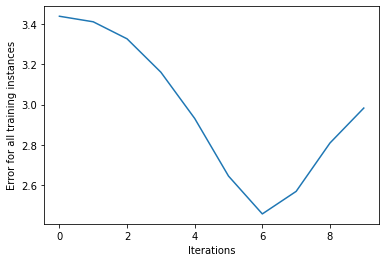

In [230]:
import matplotlib.pyplot as plt

input_vectors = np.array([
    [3, 1.5],
    [2, 1],
    [4, 1.5],
    [3, 4],
    [3.5, 0.5],
    [2, 0.5],
    [5.5, 1],
    [1, 1],
])

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors,targets,1000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
#plt.savefig("cumulative_error.png")

You instantiate the NeuralNetwork class again and call train() using the input_vectors and the target values. You specify that it should run 10000 times. This is the graph showing the error for an instance of a neural network

The overall error is decreasing, which is what you want. The image is generated in the same directory where you’re running IPython. After the largest decrease, the error keeps going up and down quickly from one interaction to another. That’s because the dataset is random and very small, so it’s hard for the neural network to extract any features.

But it’s not a good idea to evaluate the performance using this metric because you’re evaluating it using data instances that the network already saw. This can lead to overfitting, when the model fits the training dataset so well that it doesn’t generalize to new data.

### Adding More Layers to the Neural Network

The dataset in this tutorial was kept small for learning purposes. Usually, deep learning models need a large amount of data because the datasets are more complex and have a lot of nuances.

Since these datasets have more complex information, using only one or two layers isn’t enough. That’s why deep learning models are called “deep.” They usually have a large number of layers. 

By adding more layers and using activation functions, you increase the network’s expressive power and can make very high-level predictions. An example of these types of predictions is face recognition, such as when you take a photo of your face with your phone, and the phone unlocks if it recognizes the image as you